#Synchrony of spike trains

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(style='whitegrid')

In [4]:
def loadfile(filepath, neurons):
    arr  = np.loadtxt(filepath, dtype='float', delimiter=",")
    timesteps = arr[-1, 0]
    spikes = sp.coo_matrix((arr[:,2], (arr[:,0]-1, arr[:, 1]-1)), (timesteps, neurons)).tocsr()
    return spikes

In [77]:
def loadReplenish(filepath, name):
    df = pd.read_csv(filepath, index_col='time', names=['time', name])
    return df

In [5]:
def plotHist(data, xmin, xmax, nbins):
    hist, bins = np.histogram(data, range=(xmin, xmax), bins=nbins, density=True)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()

In [6]:
def plotHistDiff(data1, data2, xmin, xmax, nbins):
    hist1, bins = np.histogram(data1, range=(xmin, xmax), bins=nbins, density=True)
    hist2, bins = np.histogram(data2, range=(xmin, xmax), bins=nbins, density=True)
    hist = hist1 - hist2
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()

In [7]:
def V(trains):
    [T, N] = trains.shape
    return trains.sum(axis=1)/N

In [8]:
def Vvar(trains):
    [T, N] = trains.shape
    v = V(trains)
    a = np.sum(np.square(v))/T
    b = np.square(np.sum(v)/T)
    return a-b

In [9]:
def Vivar(trains):
    [T, N] = trains.shape
    trains = trains.tocsc()
    a = trains.power(2).sum(axis=0)/T
    b = np.square(trains.sum(axis=0)/T)
    return a-b    

In [10]:
def syncMeasure(v_var, vi_var, N):
    return v_var/(vi_var.sum()/N)

In [11]:
def calcSync(trains):
    [T, N] = trains.shape
    v_var  = Vvar(trains)
    vi_var = Vivar(trains)
    return syncMeasure(v_var, vi_var, N)

In [63]:
def slidingSync(trains, window, step_size):
    [T, N] = trains.shape
    steps = int(T/step_size)
    sync = np.empty((steps, 2))
    step = 0
    while(step < steps):
        t0 = step*step_size
        tf = t0+window
        if(tf > T):
            tf = T
        sync[step, :] = [t0, calcSync(trains[t0:tf, :])]
        step += 1
    return sync

In [64]:
neurons = 7520
high = loadfile("../../BrainPowerLogs/SampleLogs/Long/HighConst_Potential.csv", neurons)
med  = loadfile("../../BrainPowerLogs/SampleLogs/Long/MediumConst_Potential.csv", neurons)
low  = loadfile("../../BrainPowerLogs/SampleLogs/Long/LowConst_Potential.csv", neurons)
keto = loadfile("../../BrainPowerLogs/SampleLogs/Long/Keto_Potential.csv", neurons)
gluco  = loadfile("../../BrainPowerLogs/SampleLogs/Long/Gluco_Potential.csv", neurons)
hypo  = loadfile("../../BrainPowerLogs/SampleLogs/Long/Hypo_Potential.csv", neurons)

In [78]:
repHigh = loadReplenish("../../BrainPowerLogs/SampleLogs/Long/HighConst_Replenish.csv", 'high')
repMed = loadReplenish("../../BrainPowerLogs/SampleLogs/Long/MediumConst_Replenish.csv", 'med')
repLow = loadReplenish("../../BrainPowerLogs/SampleLogs/Long/LowConst_Replenish.csv", 'low')
repKeto = loadReplenish("../../BrainPowerLogs/SampleLogs/Long/Keto_Replenish.csv", 'keto')
repGluco = loadReplenish("../../BrainPowerLogs/SampleLogs/Long/Gluco_Replenish.csv", 'gluco')
repHypo = loadReplenish("../../BrainPowerLogs/SampleLogs/Long/Hypo_Replenish.csv", 'hypo')

In [105]:
replenish = pd.concat([repHigh, repMed, repLow, repKeto, repGluco, repHypo], axis=1)
temp = pd.DataFrame({'high':[0.08], 'med': [0.05], 'low': [0.02], 'keto': [0.07], 'gluco': [0.08], 'hypo': [0.05]}, index=[0])
replenish = pd.concat([temp, replenish])
print(replenish)

       gluco  high  hypo  keto   low   med
0       0.08  0.08  0.05  0.07  0.02  0.05
100     0.08  0.08   NaN   NaN  0.02  0.05
200     0.06  0.08  0.05  0.07  0.02  0.05
300     0.04  0.08   NaN   NaN  0.02  0.05
400     0.02  0.08  0.04  0.06  0.02  0.05
500     0.04  0.08   NaN   NaN  0.02  0.05
600     0.06  0.08  0.03  0.05  0.02  0.05
700     0.08  0.08   NaN   NaN  0.02  0.05
800     0.08  0.08  0.02  0.04  0.02  0.05
900     0.06  0.08   NaN   NaN  0.02  0.05
1000    0.04  0.08  0.03  0.04  0.02  0.05
1100    0.02  0.08   NaN   NaN  0.02  0.05
1200    0.04  0.08  0.04  0.05  0.02  0.05
1300    0.06  0.08   NaN   NaN  0.02  0.05
1400    0.08  0.08  0.05  0.06  0.02  0.05
1500    0.08  0.08   NaN   NaN  0.02  0.05
1600    0.06  0.08  0.05  0.07  0.02  0.05
1700    0.04  0.08   NaN   NaN  0.02  0.05
1800    0.02  0.08  0.04  0.07  0.02  0.05
1900    0.04  0.08   NaN   NaN  0.02  0.05
2000    0.06  0.08  0.03  0.06  0.02  0.05
2100    0.08  0.08   NaN   NaN  0.02  0.05
2200    0.0

(0.00088123862527610304, 0.0022156646004327985, 0.0024863281266313516, 0.0023598355820066918, 0.0014263938182378047, 0.0018173612095664453)


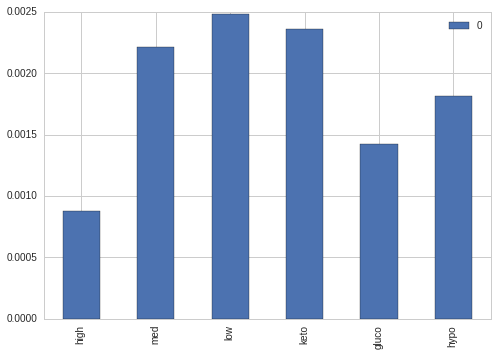

In [51]:
sHigh  = calcSync(high)
sMed   = calcSync(med)
sLow   = calcSync(low)
sKeto  = calcSync(keto)
sGluco = calcSync(gluco)
sHypo  = calcSync(hypo)
#synchrony measure over whole timeseries 
print(sHigh, sMed, sLow, sKeto, sGluco, sHypo)
pd.DataFrame([sHigh, sMed, sLow, sKeto, sGluco, sHypo],
            index=['high', 'med', 'low', 'keto', 'gluco', 'hypo']).plot(kind='bar')

In [111]:
#calculate synchrony over a sliding interval with a window of 300 and shifted by 100 timesteps
slideHigh  = slidingSync(high, 300, 100)
slideMed   = slidingSync(med, 300, 100)
slideLow   = slidingSync(low, 300, 100)
slideKeto  = slidingSync(keto, 300, 100)
slideGluco = slidingSync(gluco, 300, 100)
slideHypo  = slidingSync(hypo, 300, 100)
slidedf    = pd.DataFrame({'high': slideHigh[:,1], 'med': slideMed[:, 1], 'low': slideLow[:, 1], 
                           'keto': slideKeto[:,1], 'gluco': slideGluco[:, 1], 'hypo': slideHypo[:, 1]}, 
                         index=slideHigh[:, 0], columns=['high', 'med', 'low', 'keto', 'gluco', 'hypo'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43aeab0d90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f43adf8dfd0>], dtype=object)

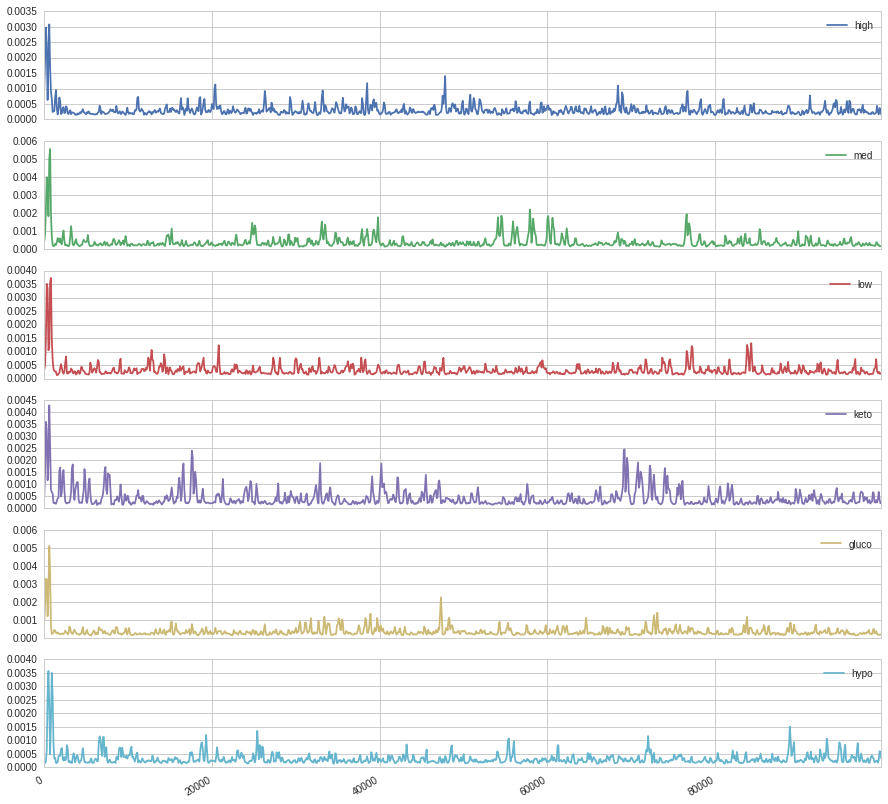

In [112]:
slidedf.plot(subplots=True, figsize=(15,15))